Scooby Doo is the iconic cartoon franchise following a group of teens and their beloved mutt as they sleuth and solve paranormal mysteries. These data visualizations explore the Tidy Tuesday Scooby Doo dataset (found here: https://github.com/rfordatascience/tidytuesday/blob/master/data/2021/2021-07-13/readme.md), particularly focusing on the "What's New Scooby-Doo?" series. WNSD ran from 2002-2006 and was a beloved childhood cartoon, as evidenced by the constant and involuntary running of the theme song in my brain while developing these visualizations.  

In [1]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
scooby_doo = read.csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-07-13/scoobydoo.csv')
scooby_doo |> head()

,index,series_name,network,season,title,imdb,engagement,date_aired,run_time,format,⋯,batman,scooby_dum,scrappy_doo,hex_girls,blue_falcon,fred_va,daphnie_va,velma_va,shaggy_va,scooby_va
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,"Scooby Doo, Where Are You!",CBS,1,What a Night for a Knight,8.1,556,1969-09-13,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
2,2,"Scooby Doo, Where Are You!",CBS,1,A Clue for Scooby Doo,8.1,479,1969-09-20,22,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
3,3,"Scooby Doo, Where Are You!",CBS,1,Hassle in the Castle,8,455,1969-09-27,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
4,4,"Scooby Doo, Where Are You!",CBS,1,Mine Your Own Business,7.8,426,1969-10-04,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
5,5,"Scooby Doo, Where Are You!",CBS,1,Decoy for a Dognapper,7.5,391,1969-10-11,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick
6,6,"Scooby Doo, Where Are You!",CBS,1,What the Hex Going On?,8.4,384,1969-10-18,21,TV Series,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,Frank Welker,Stefanianna Christopherson,Nicole Jaffe,Casey Kasem,Don Messick


Let's see how often each catch phrase is repeated! Looks like "groovy" may have fallen out of fashion by 2002. 

In [4]:
wnsd = scooby_doo |> filter(series_name == "What's New Scooby-Doo?")

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


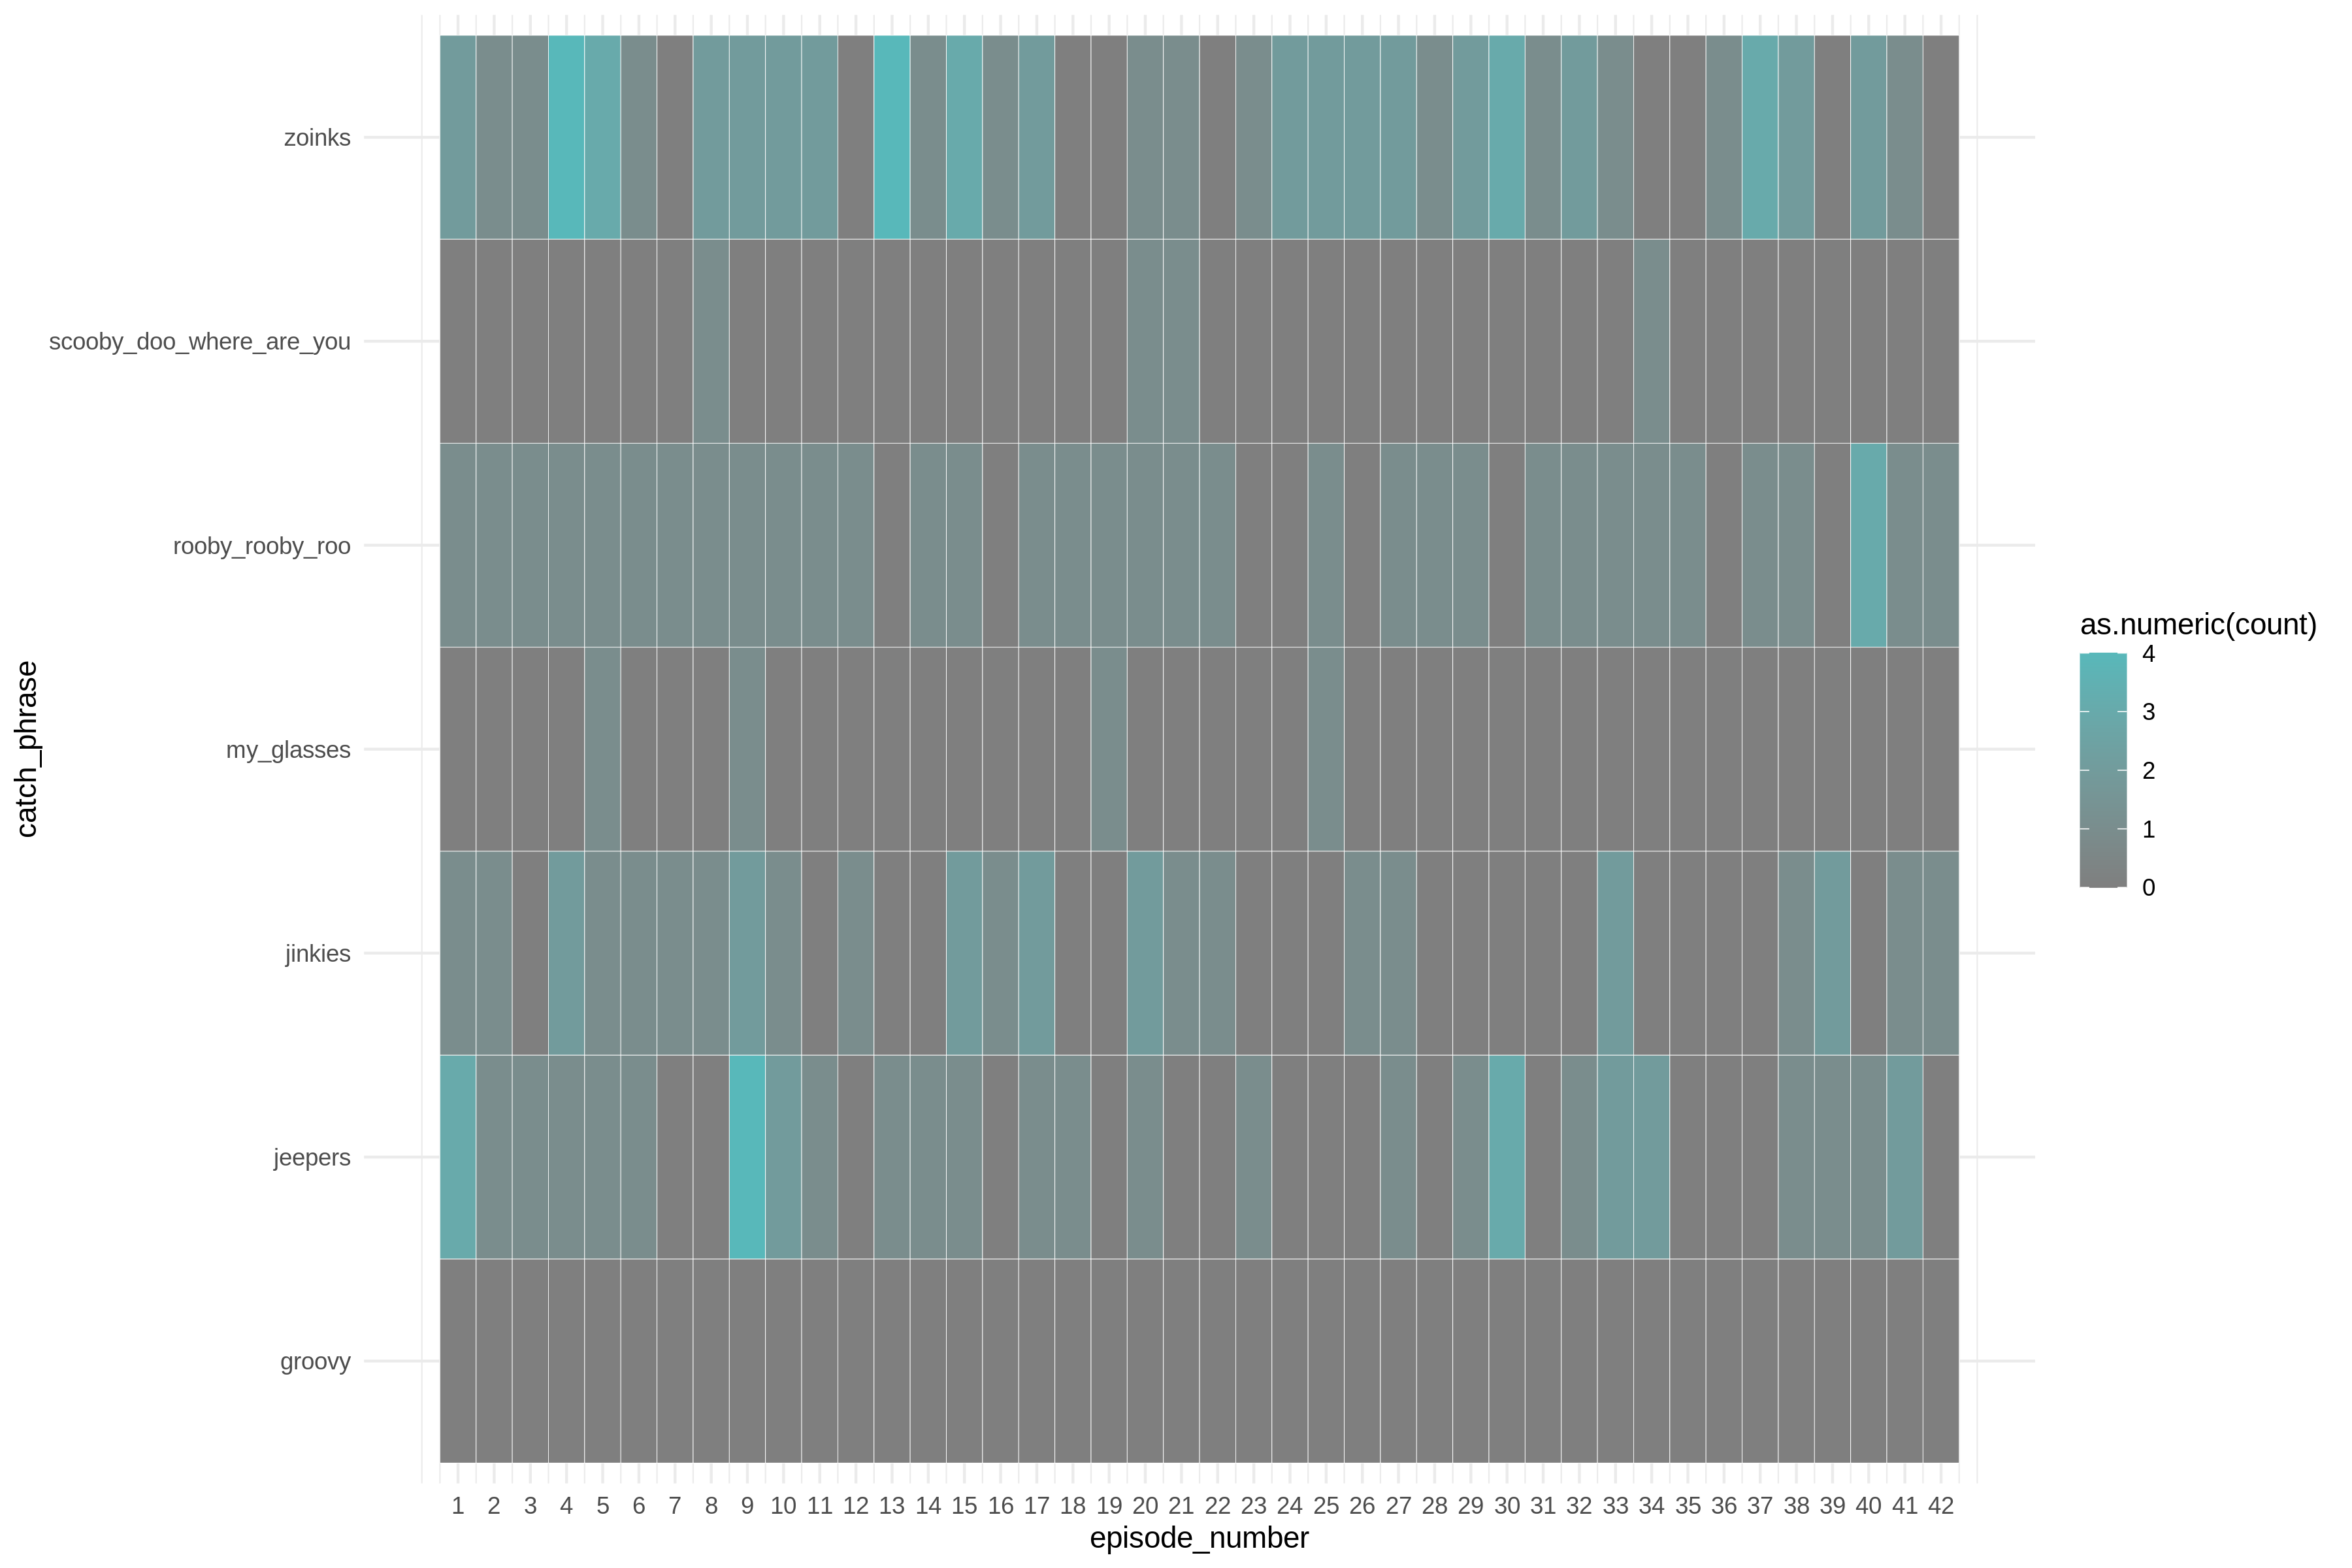

In [5]:

options(repr.plot.width = 12, repr.plot.height = 8, repr.plot.res = 300)

wnsd_phrase = wnsd |> select(jeepers, jinkies, my_glasses, zoinks, scooby_doo_where_are_you, 
                             rooby_rooby_roo, groovy) |> 
    mutate(episode_number = row_number()) |> 
    pivot_longer(cols = -episode_number, names_to = "catch_phrase", values_to = "count")

p = ggplot(wnsd_phrase, aes(x = episode_number, y = catch_phrase, fill = as.numeric(count)))

p = p + geom_tile(color = 'white') + scale_fill_gradient(low = "#7F7F7F", high = "#58B8BA") + 
    scale_x_continuous(breaks = 1:42) + 
    theme_minimal()

p

This Cleveland Dot chart explores how many times each character has either caught or been captured by the villain of the week. Despite (or perhaps due to?) being the brains of the group, Velma seems to have gotten the short end of the stick.

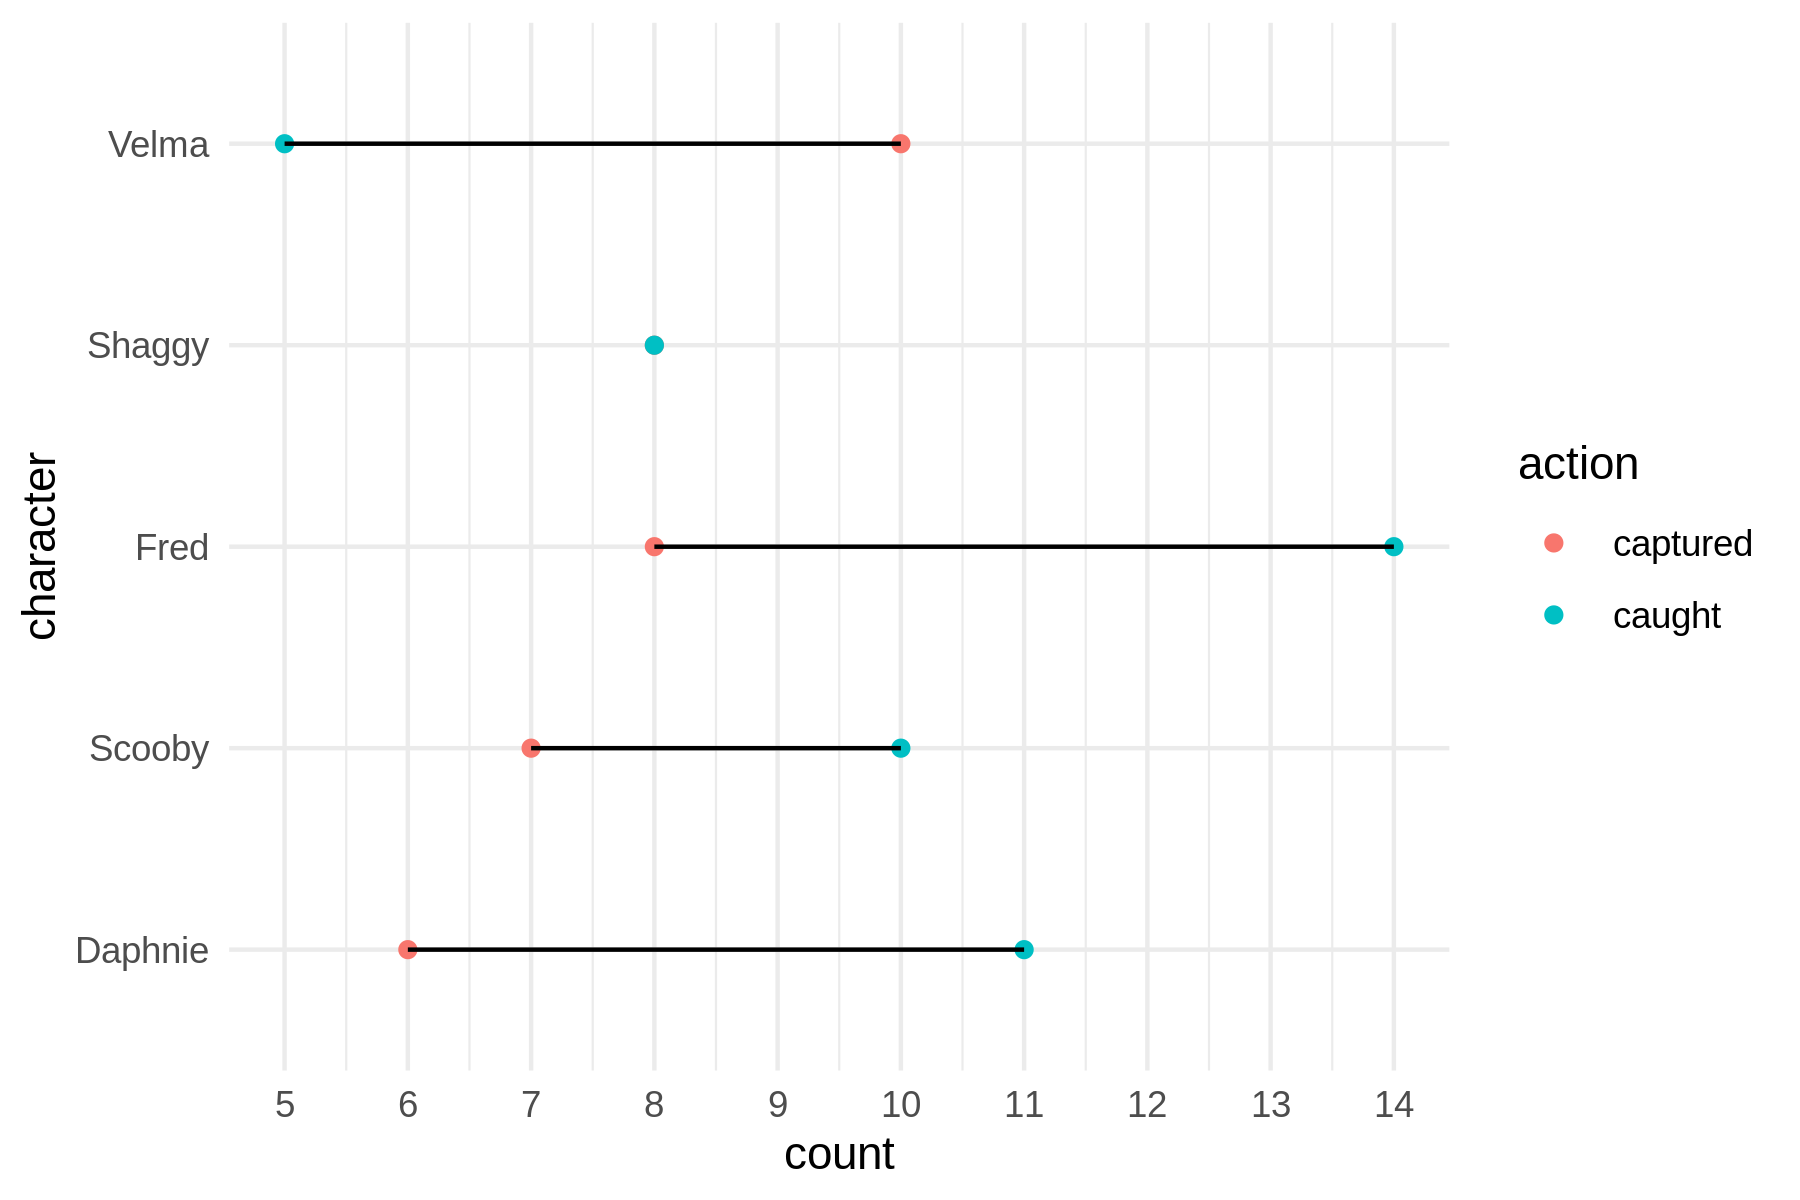

In [6]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 4)
character_names = c("Fred", "Velma", "Daphnie", "Shaggy", "Scooby")

wnsd_action = wnsd |> select(caught_fred, caught_daphnie, caught_velma, caught_shaggy, caught_scooby, 
                             captured_fred, captured_daphnie, captured_velma, 
                             captured_shaggy, captured_scooby) |> 
    summarise(across(everything(), ~sum(. == TRUE, na.rm = TRUE)))

wnsd_caught = wnsd_action |> select(cols = starts_with("caught_"))
wnsd_caught = rename_with(wnsd_caught, ~character_names, .cols = everything())
wnsd_captured = wnsd_action |> select(cols = starts_with("captured_"))
wnsd_captured = rename_with(wnsd_captured, ~character_names, .cols = everything())

caught_long = wnsd_caught |> 
  mutate(action = "caught") |>
  pivot_longer(
    cols = -action, 
    names_to = "character",
    values_to = "count")

captured_long = wnsd_captured |> 
  mutate(action = "captured") |>
  pivot_longer(
    cols = -action, 
    names_to = "character",
    values_to = "count")

wnsd_action2 = bind_rows(caught_long, captured_long) 

wnsd_action2 = wnsd_action2 |>
    arrange(action, count) |> 
    mutate(character = fct_inorder(character))

wnsd_action3 = wnsd_action2 |> 
    pivot_wider(names_from = 'action', values_from = 'count') 

options(repr.plot.res = 300)
p = ggplot(wnsd_action2, aes(x = count, y = character)) +
    geom_point(aes(color = action)) +
    geom_segment(aes(y = character, yend = character, x = captured, xend = caught), 
                 data = wnsd_action3)
p = p + scale_x_continuous(breaks = scales::pretty_breaks(n = 10)) + 
    theme_minimal()
p

This bar graph explores who is responsible for sending the most people to jail (spoiler: it's Fred). The members of Mystery Inc. do not appear to be abolitionists. The teens' ghost-busting and trap-setting escapades often culminate in the calling of law enforcement, an approach that overlooks opportunities for restorative justice. Such a critique invites us to rethink how justice and resolution are portrayed in popular media. 

Scooby Doo is of course spared culpability by virtue of being a canine. He is a very good boy. 

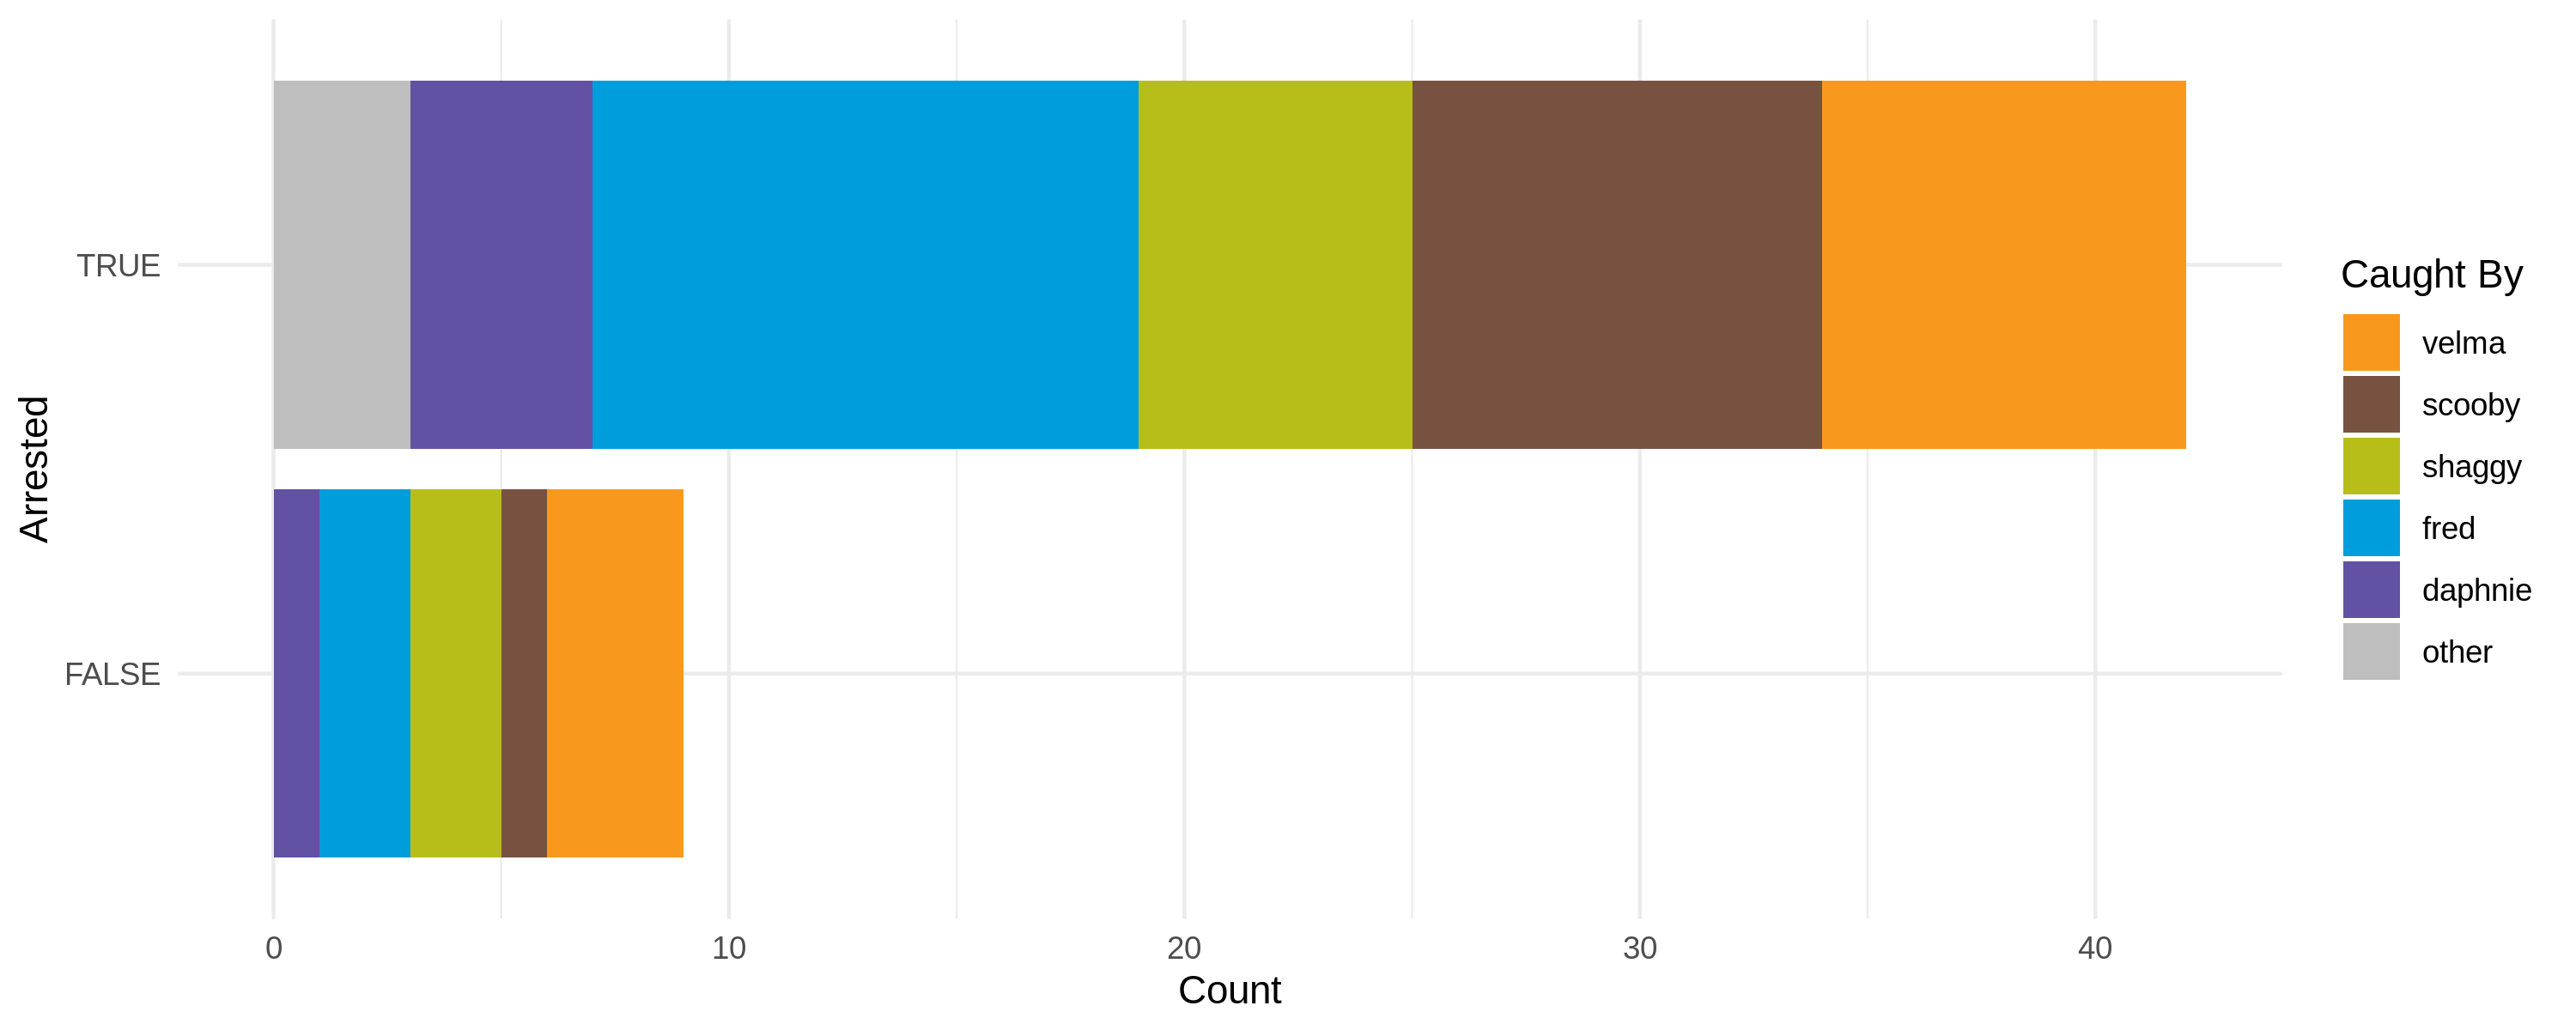

In [7]:
options(repr.plot.res = 300, repr.plot.width = 10, repr.plot.height = 4)
wnsd_cop = wnsd |> select(arrested, caught_other, caught_fred, caught_daphnie, caught_velma, 
                          caught_shaggy, caught_scooby) |> 
    mutate(caught_other = as.character(caught_other)) |> 
    pivot_longer(cols = starts_with("caught"), names_to = "character", 
                 names_prefix = "caught_", values_to = "caught") |> 
    filter(caught == 'TRUE') |> 
    mutate(character = fct_relevel(character, "velma", "scooby", "shaggy", "fred", "daphnie", "other"))

color_codes = c("#F8991D", "#785240", "#B8BE19", "#009DDC", "#6352A3", "gray")

p = ggplot(wnsd_cop, aes(y = arrested, fill = character)) +
    geom_bar () +
    scale_fill_manual(values = color_codes) +
    labs(y = "Arrested", x = "Count", fill = "Caught By") + 
    theme_minimal()

p